## Final Project Submission

Please fill out: 
* Student name: Eric Rono
* Student pace: part time
* Scheduled project review date/time: 3rd June 2024
* TM - Samwel Mwangi
* Blog post URL:


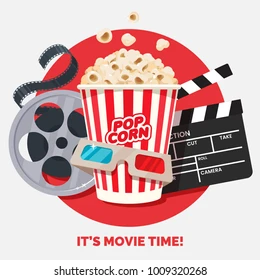

# PROCESS FLOW

# Project Overview

This project employs exploratory data analysis to extract valuable information for Microsoft's endeavor of establishing a new movie studio. By analyzing datasets from IMDB and Box Office Mojo, the project aims to provide recommendations on the most promising film genres, considering not only the total gross revenue but also the critical reviews and ratings.

The analysis evaluates the success and popularity of each genre through three key metrics: total gross income, critical response, and audience ratings. The findings suggest that Microsoft should concentrate its efforts on genres such as science fiction, adventure, animation, and action, as these genres have not only demonstrated higher total gross income but also garnered favorable critical reviews and high audience ratings.

By considering these factors holistically, Microsoft can increase its chances of producing commercially successful and critically acclaimed films that resonate with both critics and audiences alike, thereby establishing a strong presence in the competitive movie industry.


## Business Problem


Microsoft, a tech giant, is venturing into original video content creation by establishing its own movie studio. However, lacking substantial film industry experience poses a challenge. To mitigate this, a comprehensive analysis of successful box office trends through exploratory data analysis becomes crucial. This analysis aims to uncover valuable insights to guide Microsoft's nascent movie studio in making informed genre and theme decisions. By leveraging data-driven insights, Microsoft can navigate the unfamiliar film industry terrain more effectively, increasing the likelihood of producing captivating and commercially successful films.

Key inquiries:

Analyzing box office gross, audience ratings, and domestic/foreign revenue trends across genres and release years provides actionable insights for Microsoft's movie studio. Identifying top-performing genres financially, rating correlations, and evolving market dynamics equips the studio head with intelligence to craft a content strategy maximizing success in the competitive entertainment landscape.

# Data Understanding
I merged two datasets with a purpose of combining movie metadata with their corresponding reviews to enable comprehensive analysis. 
The movie_info dataset contains metadata about movies, including details such as:
1.Genre - The genre(s) of the movie. 

2.Director - The director of the movie.

3.Theatre & dvd dates - dates on cinemas and dvd

4.Runtime - The runtime of the movie in minutes.

5.Currency - revenues collected from the movie

This dataset contains reviews of the movies, including details such as:

1.Review_id - Unique identifier for each review.

2.Reviewer - The name or identifier of the reviewer

3.Rating - The rating given by the reviewer (e.g., on a scale from 1 to 10).

4.review_text - The text content of the review.

5.publisher_date - The date when the review was written.



## Data Exploration
1. Movie Genres: We will analyze the distribution of movie genres in our datasets. To visualize this, we can use bar plots or pie charts, allowing us to see which genres are most prevalent.
2. Financial Analysis: We will calculate summary statistics for box office gross incomes. Visualizations such as box plots or histograms will help us understand the distribution of gross incomes across different genres.
3. Reviewer & Ratings Analysis: We will explore the distribution of audience ratings and analyze how they vary across different genres. Histograms or KDE plots will be used to visualize this.
4. Correlation Analysis: We will examine the correlation between audience ratings and box office gross incomes. Scatter plots or correlation matrices will be used to illustrate these relationships.

# Step 1
# Import all necessary libraries and our data

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# We import all our initial datasets individually first i.e movies_info & reviews 
df_info = pd.read_csv("rt.movie_info.tsv", delimiter='\t')
df_reviews = pd.read_csv('reviews.csv')

In [58]:
#check colunms in our data
df_reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [27]:
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [59]:
#check null values
df_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [29]:
df_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [30]:
#Lets inspect our dataframes

def inspect_dataframe(df, name="DataFrame"):
    """
    Takes a DataFrame as input, and displays the head, info, and sum of all null values for each column in that DataFrame.
    """
    print(f"\n{name} Head:")
    print(df.head())
    print(f"\n{name} Info:")
    df.info()
    print(f"\n{name} Sum of Null Values for Each Column:")
    print(df.isna().sum())

def inspect_reviews_and_info(df_reviews, df_info):
    """
    Takes the reviews and info DataFrames as input, and displays the head, info, and sum of all null values for each column in both DataFrames.
    """
    inspect_dataframe(df_reviews, "Reviews DataFrame")
    inspect_dataframe(df_info, "Info DataFrame")


In [31]:
# Having df_reviews and df_info already defined DataFrames:

inspect_reviews_and_info(df_reviews, df_info)



Reviews DataFrame Head:
    id                                             review rating   fresh  \
0    3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1    3  It's an allegory in search of a meaning that n...    NaN  rotten   
2    3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3    3  Continuing along a line introduced in last yea...    NaN   fresh   
4    3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017  

Reviews DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Dat

From our output, our Reviews DataFrame has 54432 rows and 8 columns while our Info DataFrame has 1560 rows and 12 columns.


## Step 2 
# Data Cleaning
# Handling Missing and Duplicates

Let's first start by merging both our dataframes before we commence the data cleaning process.


In [32]:
#Let's remove the whitespace in the data
df_reviews.columns = df_reviews.columns.str.replace(' ','')

In [60]:
#lets merge our our dataframes
df_merged = pd.merge(df_reviews, df_info, on='id')

In [34]:
# Confirm that our data is merged
df_merged.shape

(54432, 19)

In [61]:
#Lets confirm the merged data
df_merged.head(3)

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


Identify and handle missing values appropriately by using methods such as imputation, dropping rows or columns, or other suitable techniques, depending on the context.
How many missing values are there in each column of the IMDb dataset?
What proportion of the IMDb dataset consists of missing values?

In [62]:
#checking null values
df_merged.isna().sum()

id                  0
review           5563
rating_x        13517
fresh               0
critic           2722
top_critic          0
publisher         309
date                0
synopsis          132
rating_y           86
genre              87
director         5440
writer           9226
theater_date     1226
dvd_date         1226
currency        21122
box_office      21122
runtime           838
studio          14307
dtype: int64

In [63]:
#merged data shape
df_merged.shape

(54432, 19)

In [64]:
#For simplicity our code checks the summary of our data before cleaning, drops all the missing values and cofirms that we have droppped tye missing values.
# Print summary statistics before handling missing values
print("Summary statistics before handling missing values:")
print(df_merged.describe(include='all'))
print("\n")

Summary statistics before handling missing values:
                  id                   review rating_x  fresh        critic  \
count   54432.000000                    48869    40915  54432         51710   
unique           NaN                    48682      186      2          3496   
top              NaN  Parental Content Review      3/5  fresh  Emanuel Levy   
freq             NaN                       24     4327  33035           595   
mean     1045.706882                      NaN      NaN    NaN           NaN   
std       586.657046                      NaN      NaN    NaN           NaN   
min         3.000000                      NaN      NaN    NaN           NaN   
25%       542.000000                      NaN      NaN    NaN           NaN   
50%      1083.000000                      NaN      NaN    NaN           NaN   
75%      1541.000000                      NaN      NaN    NaN           NaN   
max      2000.000000                      NaN      NaN    NaN           NaN   



In [ ]:
# Drop rows with missing values
df_merged.dropna(inplace = True)

#Print summary statistics after handling missing values
print("Summary statistics after handling missing values:")
print(df_merged.describe(include='all'))

In [39]:
df_merged.columns

Index(['id', 'review', 'rating_x', 'fresh', 'critic', 'top_critic',
       'publisher', 'date', 'synopsis', 'rating_y', 'genre', 'director',
       'writer', 'theater_date', 'dvd_date', 'currency', 'box_office',
       'runtime', 'studio'],
      dtype='object')

Since our data has no more missing valueas, lets handle the duplicates in the data before analysis.
First lets chek for duplicates in our data and write code to drop the duplicates

In [40]:
df_merged.shape

(17727, 19)

In [41]:
# Check for duplicates in the merged DataFrame
duplicates = df_merged[df_merged.duplicated()]
# Display the duplicate rows if any
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicates found.")
    # Remove duplicates
df_merged = df_merged.drop_duplicates()

# Display the first few rows of the cleaned DataFrame
print("First few rows of the cleaned DataFrame:")
print(df_merged.head())

# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:", df_merged.shape)

No duplicates found.
First few rows of the cleaned DataFrame:
    id                                             review rating_x   fresh  \
0    3  A distinctly gallows take on contemporary fina...      3/5   fresh   
6    3  Quickly grows repetitive and tiresome, meander...        C  rotten   
7    3  Cronenberg is not a director to be daunted by ...      2/5  rotten   
11   3  While not one of Cronenberg's stronger films, ...       B-   fresh   
12   3  Robert Pattinson works mighty hard to make Cos...      2/4  rotten   

            critic  top_critic           publisher               date  \
0       PJ Nabarro           0     Patrick Nabarro  November 10, 2018   
6   Eric D. Snider           0     EricDSnider.com      July 17, 2013   
7     Matt Kelemen           0  Las Vegas CityLife     April 21, 2013   
11    Emanuel Levy           0     EmanuelLevy.Com   February 3, 2013   
12  Christian Toto           0       Big Hollywood   January 15, 2013   

                              

In [42]:
df_merged['box_office'].dtype

dtype('O')

## Step 3: Data Type Conversion
We are going to convert such as runtim, theatre_date, release_year, box_office and rating_x to be readable by the notebook.

In [43]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17727 entries, 0 to 53890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            17727 non-null  int64 
 1   review        17727 non-null  object
 2   rating_x      17727 non-null  object
 3   fresh         17727 non-null  object
 4   critic        17727 non-null  object
 5   top_critic    17727 non-null  int64 
 6   publisher     17727 non-null  object
 7   date          17727 non-null  object
 8   synopsis      17727 non-null  object
 9   rating_y      17727 non-null  object
 10  genre         17727 non-null  object
 11  director      17727 non-null  object
 12  writer        17727 non-null  object
 13  theater_date  17727 non-null  object
 14  dvd_date      17727 non-null  object
 15  currency      17727 non-null  object
 16  box_office    17727 non-null  object
 17  runtime       17727 non-null  object
 18  studio        17727 non-null  object
dtypes: int64(

Our data has unique values which have to be converted into intergers to normalize the data for easier visualization

In [44]:
#check for unique characters
df_merged['rating_x'].unique()

array(['3/5', 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-', '5/5',
       'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', '6',
       'C+', '0.5/4', 'D', '3.1/5', '3/6', '2.2/5', '0/5', '0.5/10', 'A',
       '2.5', '0/4', '6.5/10', '3.0/5', '3', '2.1/2', '3.0/4', '2.3/10',
       '1', '4.5/10', '4.5/5', '3.5', '8.6/10', 'D-', '2.0/4', '2.7',
       '4.2/10', '5.8', '4', '7.1/10', '1/10', '9', '4.0/5', '0/10',
       '2/10', '5.0/10', '5.9/10', '2.4/5', 'A+', '7', '4.9', '5.0/5',
       '7.4/10', '0.5/5', '1.5', '1.5/10', '8.5/10', '2.3/4', '8.8/10',
       '4.0/10', '5', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10', '4/6',
       '7.6/10', '4.0/4', '8.1/10', '7.7/10', '1.8', '8.9/10', '8.9',
       '8.2/10', '8.3/10', '2/6', '2.6/6', 'F+', '1.0/4', '6.0/10',
       '3.5/10', '9.5/10', '7.9/10', '1.9/5', '8.7/10', '9.6/10',
       '5

In [45]:
import numpy as np

In [46]:
# Function to normalize ratings to a scale of 0 to 10
def normalize_rating(rating):
    # Define conversion dictionaries
    letter_to_num = {
        'A+': 10, 'A': 9.5, 'A-': 9,
        'B+': 8.5, 'B': 8, 'B-': 7.5,
        'C+': 7, 'C': 6.5, 'C-': 6,
        'D+': 5.5, 'D': 5, 'D-': 4.5,
        'F': 0, 'F+': 2.5
    }
    
    if isinstance(rating, str):
        rating = rating.replace(' ', '')  # Remove spaces
        if rating in letter_to_num:
            return letter_to_num[rating]
        if '/' in rating:
            try:
                num, denom = rating.split('/')
                return (float(num) / float(denom)) * 10
            except ValueError:
                return np.nan
        try:
            return float(rating) * 2 if float(rating) <= 5 else float(rating)
        except ValueError:
            return np.nan
    return np.nan

# Apply normalization function to the 'rating_x' column
df_merged['rating_x_cleaned'] = df_merged['rating_x'].apply(normalize_rating)

# Drop rows where 'rating_x_cleaned' is NaN (couldn't be converted)
df_merged = df_merged.dropna(subset=['rating_x_cleaned'])

# Print the cleaned 'rating_x' column for verification
print(df_merged[['rating_x', 'rating_x_cleaned']].head(20))

   rating_x  rating_x_cleaned
0       3/5              6.00
6         C              6.50
7       2/5              4.00
11       B-              7.50
12      2/4              5.00
13        B              8.00
14      3/4              7.50
15      3/5              6.00
16      4/5              8.00
17        B              8.00
18      2/4              5.00
19      4/4             10.00
20     6/10              6.00
21      1/4              2.50
22        8              8.00
23      2/5              4.00
24    2.5/4              6.25
25     4/10              4.00
27    2.5/4              6.25
29    2.0/5              4.00


Our runtime has unique characters in form of 'minutes', in order for us to easily vizualize the data we well have to change the data to intergers and drop any rows will NaN values to normalize the data.

In [47]:
df_merged['runtime'].unique()

array(['108 minutes', '82 minutes', '123 minutes', '127 minutes',
       '96 minutes', '106 minutes', '93 minutes', '99 minutes',
       '117 minutes', '116 minutes', '101 minutes', '109 minutes',
       '134 minutes', '124 minutes', '100 minutes', '86 minutes',
       '188 minutes', '98 minutes', '137 minutes', '115 minutes',
       '97 minutes', '118 minutes', '88 minutes', '94 minutes',
       '132 minutes', '133 minutes', '95 minutes', '107 minutes',
       '111 minutes', '119 minutes', '142 minutes', '126 minutes',
       '87 minutes', '114 minutes', '91 minutes', '121 minutes',
       '125 minutes', '128 minutes', '104 minutes', '84 minutes',
       '89 minutes', '103 minutes', '102 minutes', '92 minutes',
       '148 minutes', '120 minutes', '110 minutes', '113 minutes',
       '105 minutes', '166 minutes', '112 minutes', '170 minutes',
       '83 minutes', '76 minutes', '159 minutes', '67 minutes',
       '136 minutes', '90 minutes', '138 minutes', '129 minutes',
       '161 mi

In [48]:
# Strip 'minutes' from 'runtime' column and convert to integers
df_merged['runtime'] = df_merged['runtime'].str.replace(' minutes', '').astype(int)

# Drop rows where 'runtime' is NaN (couldn't be converted)
df_merged = df_merged.dropna(subset=['runtime'])

# Print the cleaned 'runtime' column for verification
print(df_merged[['runtime']].head(20))

    runtime
0       108
6       108
7       108
11      108
12      108
13      108
14      108
15      108
16      108
17      108
18      108
19      108
20      108
21      108
22      108
23      108
24      108
25      108
27      108
29      108


Let's convert our dates from theatre_date to just months and year and have the data in two columns as Release-Month and Release_Year. This become our movie release timelines.

In [49]:
df_merged['theater_date'].unique()

array(['Aug 17, 2012', 'Jan 11, 2002', 'Apr 27, 2006', 'Dec 25, 2013',
       'May 14, 2004', 'May 16, 2003', 'Feb 10, 2006', 'Jul 1, 2011',
       'Aug 20, 2010', 'Nov 18, 2016', 'Apr 16, 2010', 'Jul 12, 2002',
       'Oct 1, 2010', 'Mar 19, 2010', 'Dec 11, 2009', 'Dec 8, 2000',
       'Jan 16, 2009', 'Jun 8, 2012', 'Jul 12, 2013', 'Apr 22, 2005',
       'Sep 23, 2000', 'Oct 18, 2002', 'Jun 23, 2006', 'Nov 20, 2015',
       'Apr 11, 2003', 'Sep 21, 2007', 'May 30, 2014', 'Mar 2, 2012',
       'Jul 28, 2006', 'Aug 13, 2010', 'Mar 12, 2004', 'Mar 9, 2012',
       'Feb 7, 2013', 'Oct 16, 2015', 'Dec 21, 2011', 'Oct 22, 2010',
       'Mar 14, 2014', 'Apr 18, 2014', 'Mar 10, 2006', 'Nov 20, 2009',
       'Aug 28, 2009', 'Dec 5, 2008', 'Feb 1, 2013', 'Dec 13, 2002',
       'Jun 14, 2002', 'Jul 8, 2005', 'Apr 21, 2006', 'Jun 10, 2011',
       'Apr 30, 2004', 'Sep 14, 2001', 'Mar 11, 2011', 'Apr 6, 2012',
       'Dec 21, 2005', 'Jun 11, 2004', 'May 31, 2013', 'Nov 28, 2007',
       'Jun 18, 2

In [50]:
# Convert 'theater_date' to datetime format
df_merged['theater_date'] = pd.to_datetime(df_merged['theater_date'], format='%b %d, %Y')

# Extract month and year from 'theater_date'
df_merged['Release_Month'] = df_merged['theater_date'].dt.month
df_merged['Release_Year'] = df_merged['theater_date'].dt.year

# Print the new columns for verification
print(df_merged[['theater_date', 'Release_Month', 'Release_Year']].head(20))


   theater_date  Release_Month  Release_Year
0    2012-08-17              8          2012
6    2012-08-17              8          2012
7    2012-08-17              8          2012
11   2012-08-17              8          2012
12   2012-08-17              8          2012
13   2012-08-17              8          2012
14   2012-08-17              8          2012
15   2012-08-17              8          2012
16   2012-08-17              8          2012
17   2012-08-17              8          2012
18   2012-08-17              8          2012
19   2012-08-17              8          2012
20   2012-08-17              8          2012
21   2012-08-17              8          2012
22   2012-08-17              8          2012
23   2012-08-17              8          2012
24   2012-08-17              8          2012
25   2012-08-17              8          2012
27   2012-08-17              8          2012
29   2012-08-17              8          2012


In [51]:
#confirm that our new coluumns have been added to our dataframe
df_merged.columns

Index(['id', 'review', 'rating_x', 'fresh', 'critic', 'top_critic',
       'publisher', 'date', 'synopsis', 'rating_y', 'genre', 'director',
       'writer', 'theater_date', 'dvd_date', 'currency', 'box_office',
       'runtime', 'studio', 'rating_x_cleaned', 'Release_Month',
       'Release_Year'],
      dtype='object')

In [52]:
df_merged['box_office'].unique()

array(['600,000', '41,032,915', '224,114', '20,518,224', '1,971,135',
       '201,010', '54,100,000', '35,565,975', '4,806,750', '5,051,927',
       '1,000,000', '42,929,971', '13,248,477', '64,001,297',
       '37,431,431', '67,771,442', '73,023,275', '4,007,792', '1,626,289',
       '3,998,889', '2,839,256', '128,579,698', '21,318,194', '8,518,148',
       '12,583,510', '35,000,629', '37,331,031', '145,778', '63,400,000',
       '80,574,010', '47,781,388', '5,600,000', '134,455,175',
       '25,957,696', '308,164', '32,741,596', '15,986,272', '13,710,572',
       '4,756,532', '42,194,060', '7,366,736', '8,134,217', '419,361',
       '1,341,151', '121,500,000', '154,485,963', '46,982,632',
       '55,400,000', '2,536,460', '39,697,363', '21,379,315', '480,926',
       '82,468,131', '44,478,018', '1,300,000', '6,426,953', '10,500,000',
       '32,000,000', '35,764,982', '14,037,964', '26,800,000', '598,103',
       '67,631,157', '88,800,000', '12,610,731', '241,250,669',
       '107,50

Lets convert our box-office column to string and remove all the special characters from our data.

In [53]:
# Convert 'box_office' to string, remove special characters, and convert to integers
df_merged['box_office'] = df_merged['box_office'].astype(str).str.replace('[^\d]', '', regex=True).astype(int)
print(df_merged[['box_office']].head(20))

    box_office
0       600000
6       600000
7       600000
11      600000
12      600000
13      600000
14      600000
15      600000
16      600000
17      600000
18      600000
19      600000
20      600000
21      600000
22      600000
23      600000
24      600000
25      600000
27      600000
29      600000


In [54]:
df_merged['genre'].unique

<bound method Series.unique of 0                       Drama|Science Fiction and Fantasy
6                       Drama|Science Fiction and Fantasy
7                       Drama|Science Fiction and Fantasy
11                      Drama|Science Fiction and Fantasy
12                      Drama|Science Fiction and Fantasy
                               ...                       
53882    Action and Adventure|Science Fiction and Fantasy
53883    Action and Adventure|Science Fiction and Fantasy
53887                                        Comedy|Drama
53889                                        Comedy|Drama
53890                                        Comedy|Drama
Name: genre, Length: 17726, dtype: object>

Lets map our genre column to reduce the no of genres to the minimum 

In [55]:
# Define the mapping of genres
genre_mapping = {
    'Action and Adventure': 'Action and Adventure',
    'Science Fiction and Fantasy': 'Science Fiction and Fantasy',
    'Comedy': 'Comedy',
    'Drama': 'Drama',
    'Animation': 'Animation',
    'Horror': 'Horror',
    'Mystery and Suspense': 'Mystery and Suspense',
    'Musical and Performing Arts': 'Musical and Performing Arts',
    'Documentary': 'Documentary',
    'Romance': 'Romance',
    'Western': 'Western',
    'Kids and Family': 'Family and Family',
    'Art House and International': 'Art House and International',
    'Television': 'Television',
    'Special Interest': 'Special Interest',
    'Faith and Spirituality': 'Faith and Spirituality'
}

# Explode the genre column into multiple rows
df_merged = df_merged.assign(genre=df_merged['genre'].str.split('|')).explode('genre')

# Apply the genre mapping
df_merged['mapped_genre'] = df_merged['genre'].map(genre_mapping)

# Fill NaN values with the original genre
df_merged['mapped_genre'] = df_merged['mapped_genre'].fillna(df_merged['genre'])

# Filter out unmapped genres
df_merged = df_merged[df_merged['mapped_genre'].isin(genre_mapping.values())]

In [56]:
df_merged.columns

Index(['id', 'review', 'rating_x', 'fresh', 'critic', 'top_critic',
       'publisher', 'date', 'synopsis', 'rating_y', 'genre', 'director',
       'writer', 'theater_date', 'dvd_date', 'currency', 'box_office',
       'runtime', 'studio', 'rating_x_cleaned', 'Release_Month',
       'Release_Year', 'mapped_genre'],
      dtype='object')

In [57]:
# checking unique values
df_merged['mapped_genre'].unique()

array(['Drama', 'Science Fiction and Fantasy', 'Comedy',
       'Action and Adventure', 'Art House and International',
       'Musical and Performing Arts', 'Horror', 'Mystery and Suspense',
       'Family and Family', 'Romance', 'Western', 'Special Interest',
       'Animation', 'Documentary', 'Faith and Spirituality', 'Television'],
      dtype=object)

This code will help you identify and remove rows with incorrect data types in the merged DataFrame, focusing on columns other than id

Our code checks the data types using the function. Then Iterates over the columns and remove rows where the data type does not match the expected type using the check_dtype function. Also, ensure that the column exists in the DataFrame before applying the check.

## Step 4: Data Visualization

1.**Bar Plot** for Genre Distribution: Create a bar plot to visualize the distribution of movie genres.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12028\2669617384.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_merged, x='mapped_genre', y='rating_x_cleaned', palette='viridis', ci=None)


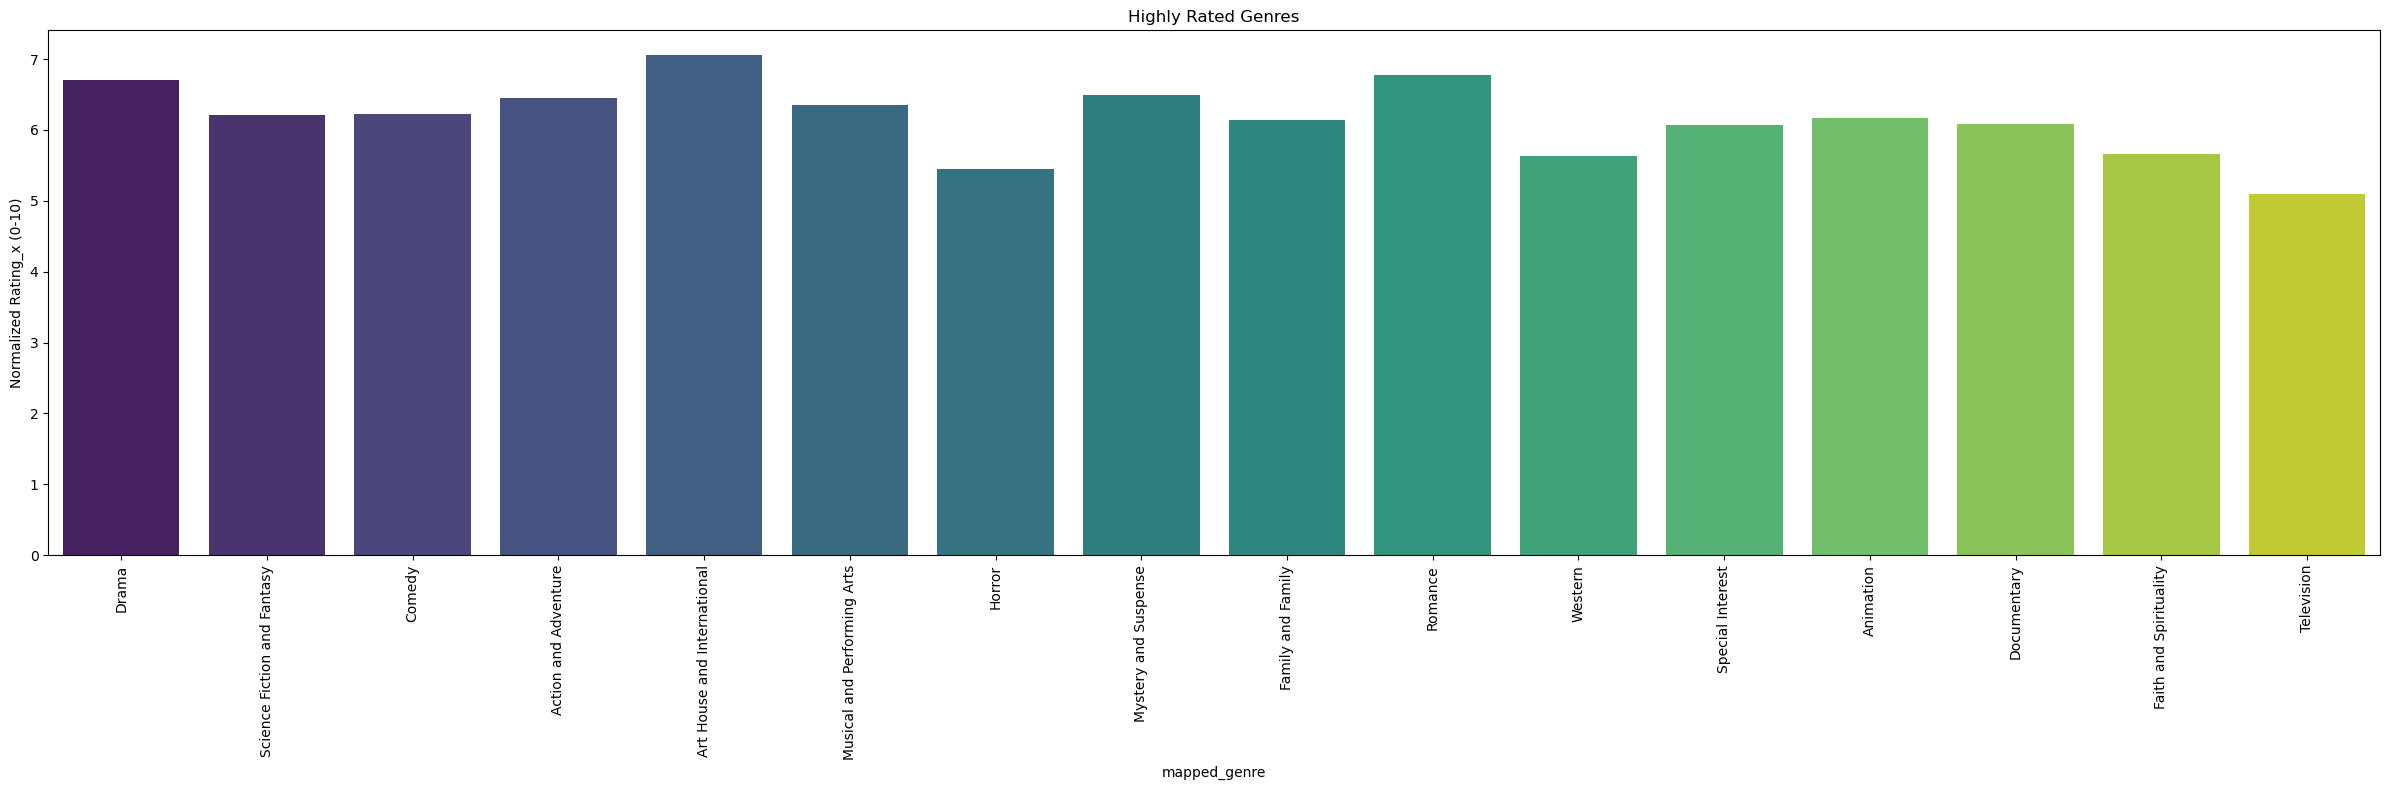

In [35]:


# Create a bar plot to visualize the relationship between genres and rating_x
plt.figure(figsize=(24, 8))
sns.barplot(data=df_merged, x='mapped_genre', y='rating_x_cleaned', palette='viridis', ci=None)
plt.xticks(rotation=90)
plt.title('Highly Rated Genres')
plt.xlabel('mapped_genre')
plt.ylabel('Normalized Rating_x (0-10)')
plt.tight_layout()

1. The barplot illustrates the distribution of movie ratings across different movie genres which gives gives insights on the most favoured movies.
2. Action & Adventure, Art House & International, Drama, Romance, Documentary/Musical & Perfoming Arts are the top rated movie genres suggeting the diversity in audince preference.
3. Action, Romance, Art, Documentary, Musical and Perfoming Arts present an opportunity for Microsoft to delve into the industry as their ratings represents populairity among consumers

2. **Histogram** to Represent Revenue Distribution against Genres

We visualize our data below showing income distribution from movie genres in our data. 

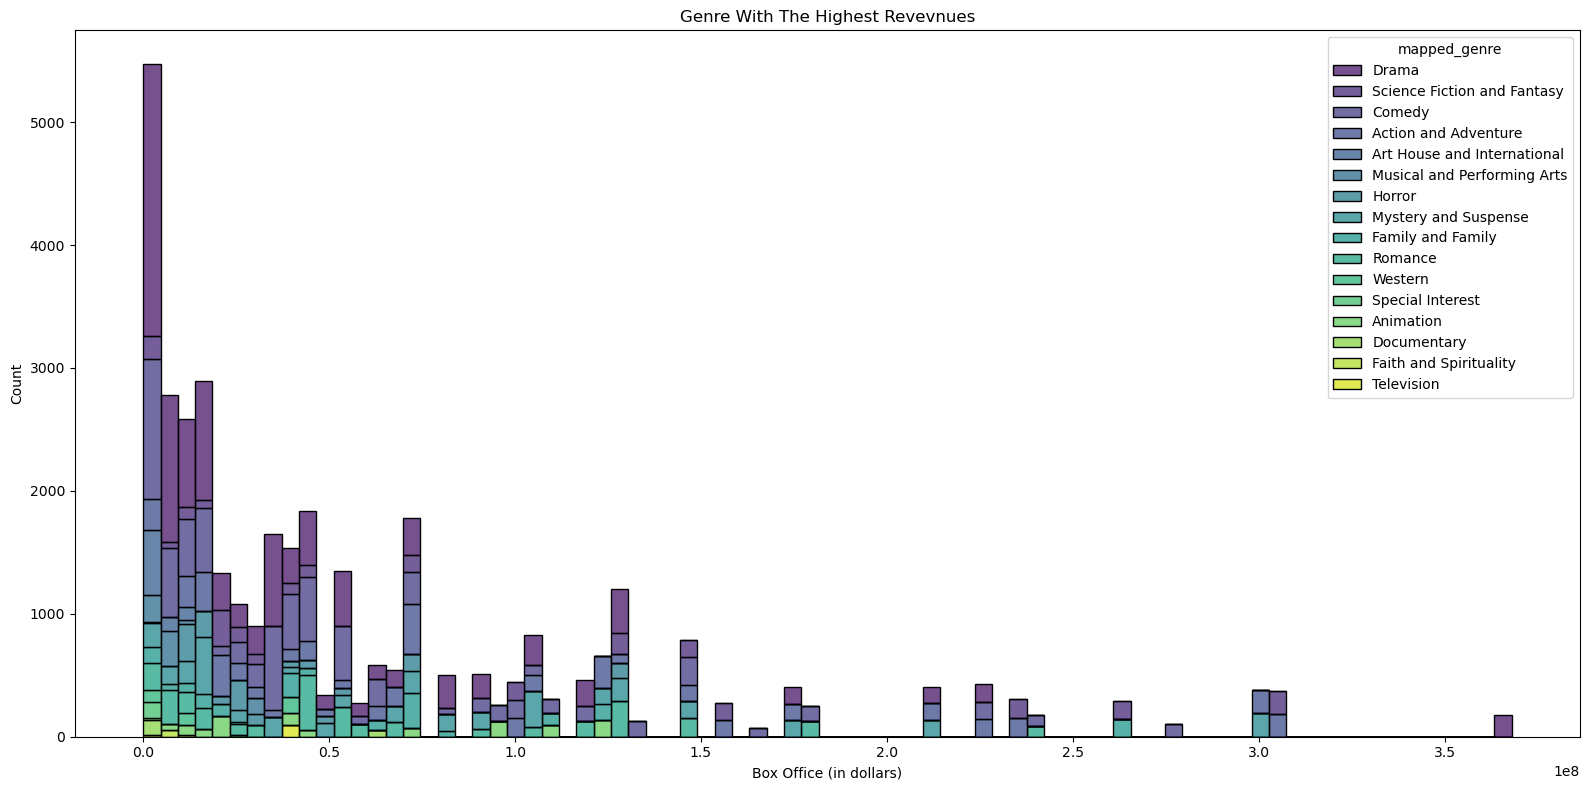

In [36]:
# Create a histogram plot to visualize the relationship between genre and box office
plt.figure(figsize=(16, 8))
sns.histplot(data=df_merged, x='box_office', hue='mapped_genre', multiple='stack', palette='viridis', kde=False)
plt.title('Genre With The Highest Revevnues')
plt.xlabel('Box Office (in dollars)')
plt.ylabel('Count')
plt.tight_layout()

Our visualized data show the movie genres with the highest income revenue.
1. The highest income earners from the data are Drama, Comedy, Science Fiction and Fantasy.
2. Action and Advnture too are amongst the top income earners.
This poses a perfect avenue for the company to dive into the movie production industry.

3. **Boxplot**. This represention movie revenues and movie Runtime. We would be able to understand the movie runtime that generates the highest income.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


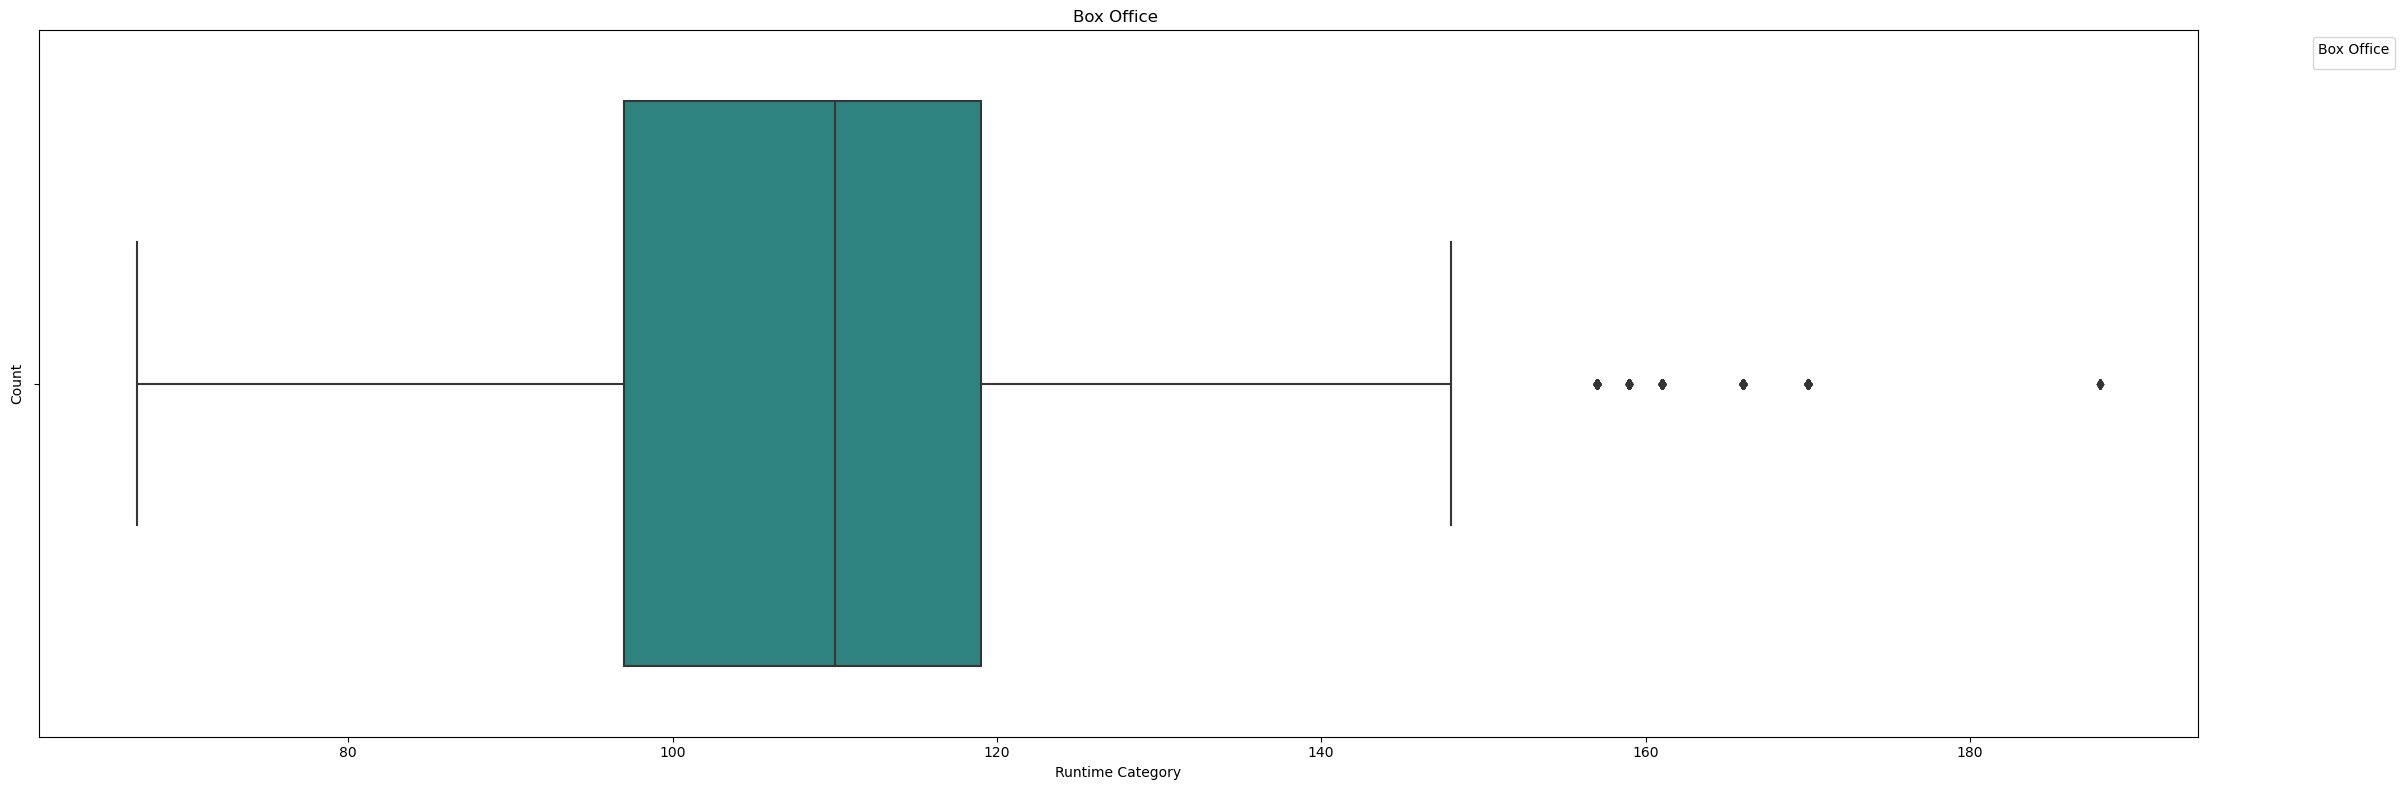

In [333]:
# Create a count plot to visualize the relationship between runtime categories and box office categories
plt.figure(figsize=(24, 8))
sns.boxplot(data=df_merged, x='runtime', hue='box_office', palette='viridis')
plt.title('Box Office ')
plt.xlabel('Runtime Category')
plt.ylabel('Count')
plt.legend(title='Box Office', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

4. **Countplot** to visualize the representaion of mapped_genre against movie runtime

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15552\2938462980.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


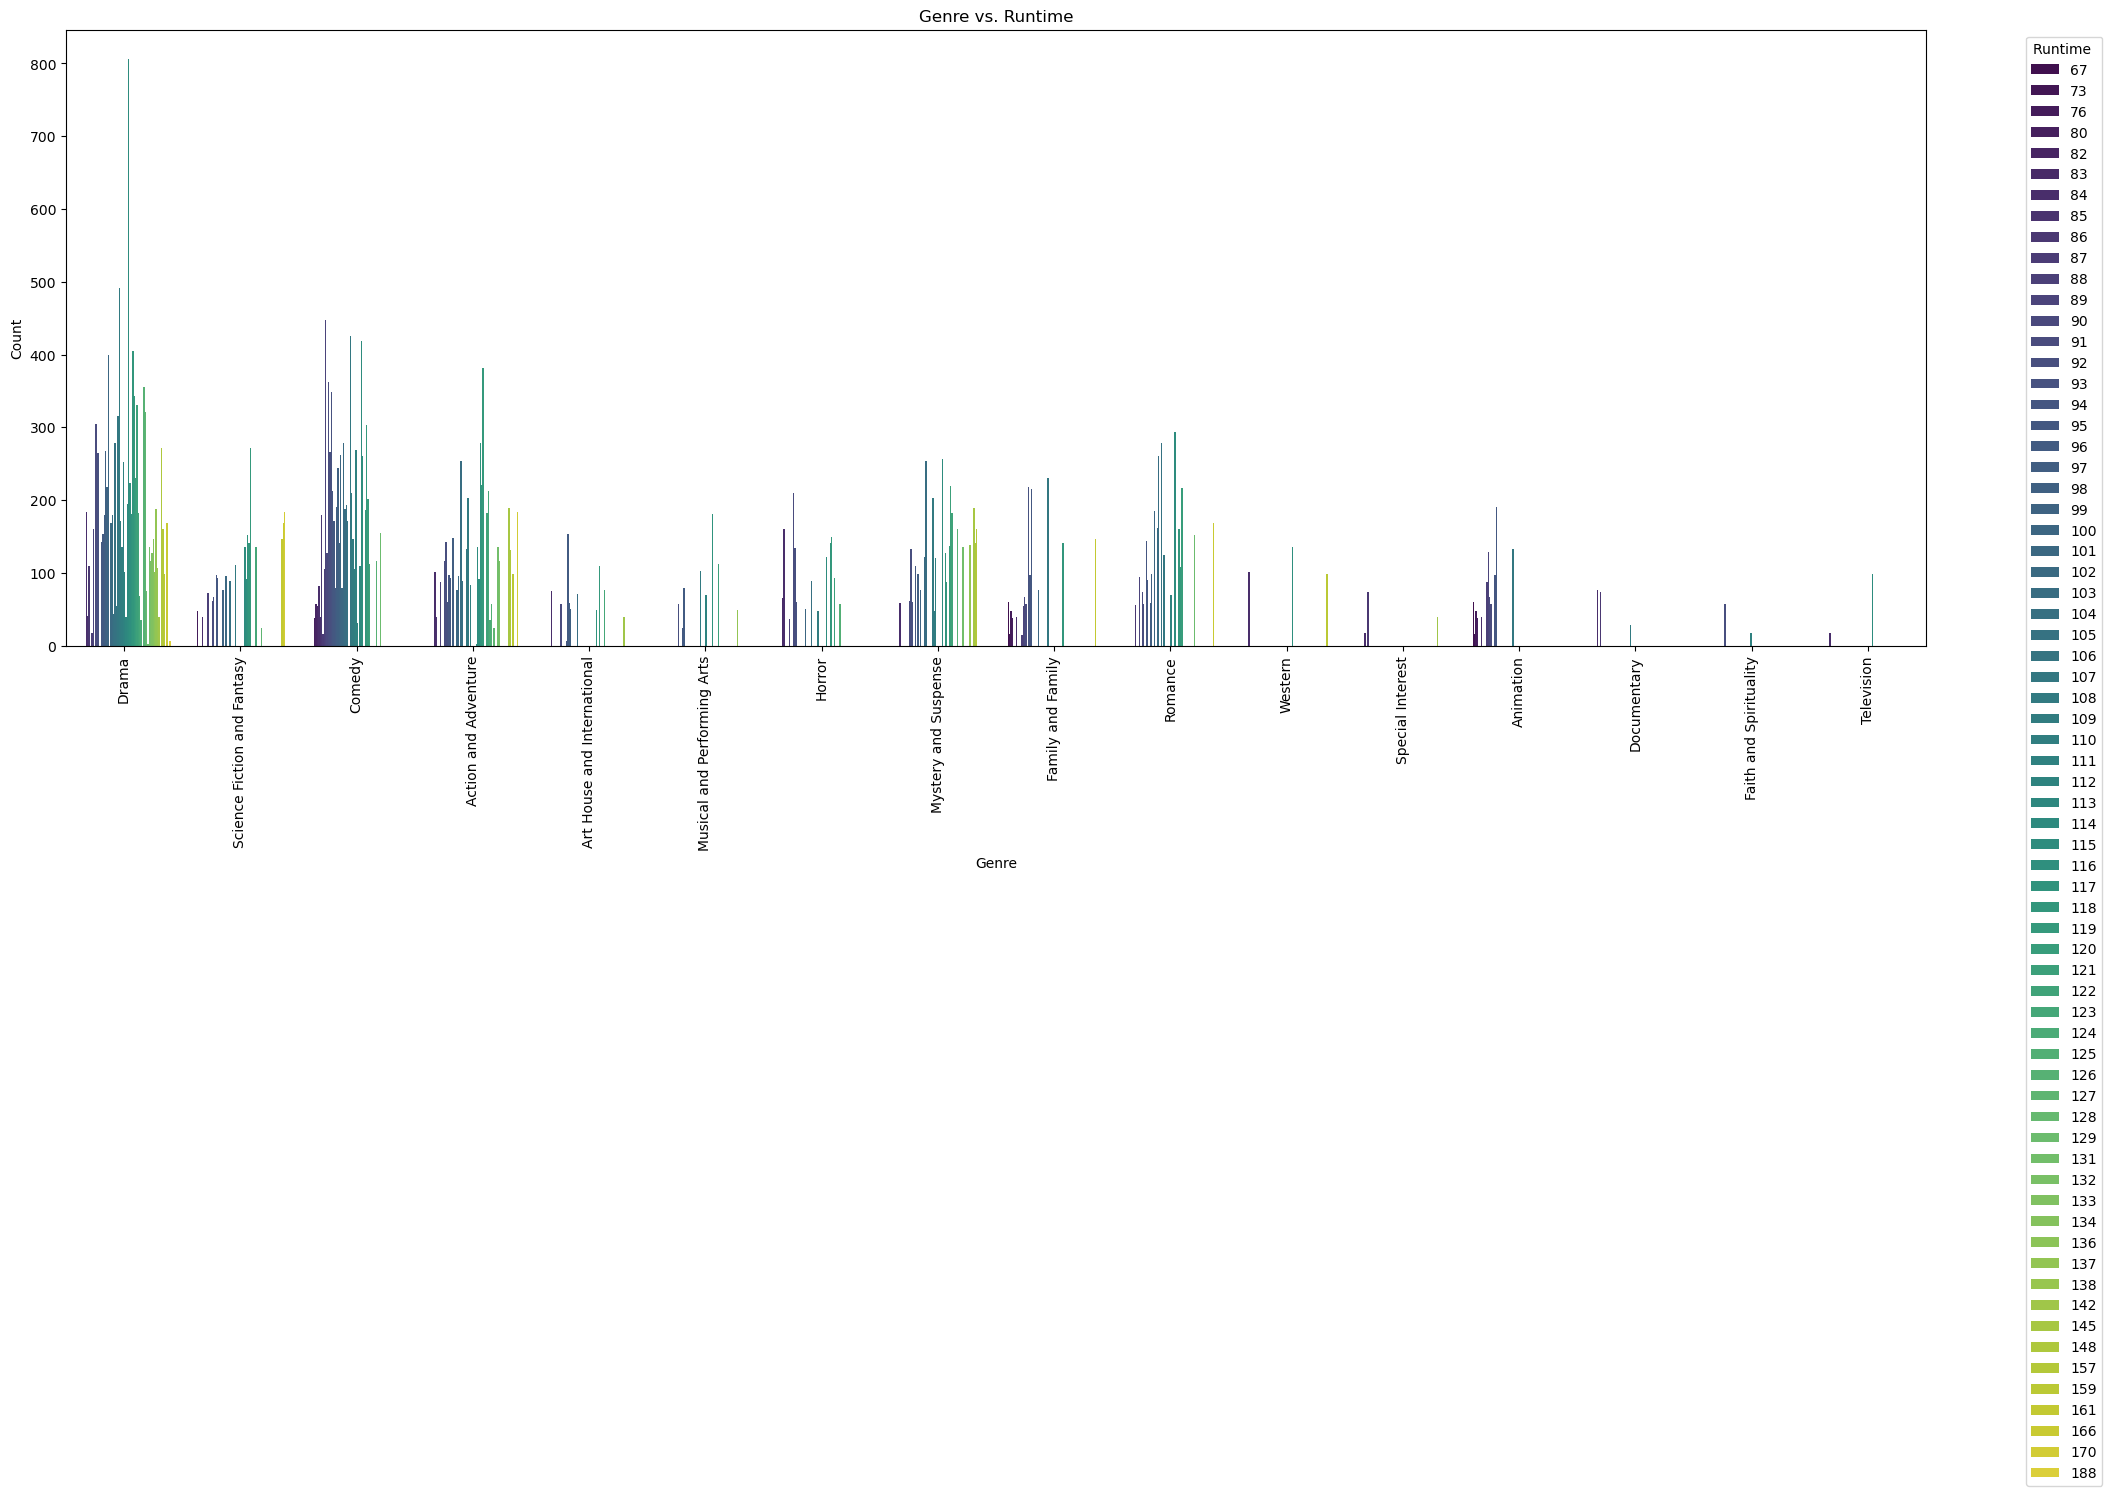

In [346]:
# Create a count plot to visualize the relationship between genres and runtime categories
plt.figure(figsize=(24, 8))
sns.countplot(data=df_merged, x='mapped_genre', hue='runtime', palette='viridis')
plt.title('Genre vs. Runtime')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Runtime ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

From out analysis, genres with the highest movie runtimes are Drama Science Fiction & Fantasy, Comedy and Action & Adventure as these are the most produced films in the industry.

5. **Countplot** to visualize the relationship between between release months and mapped_genre

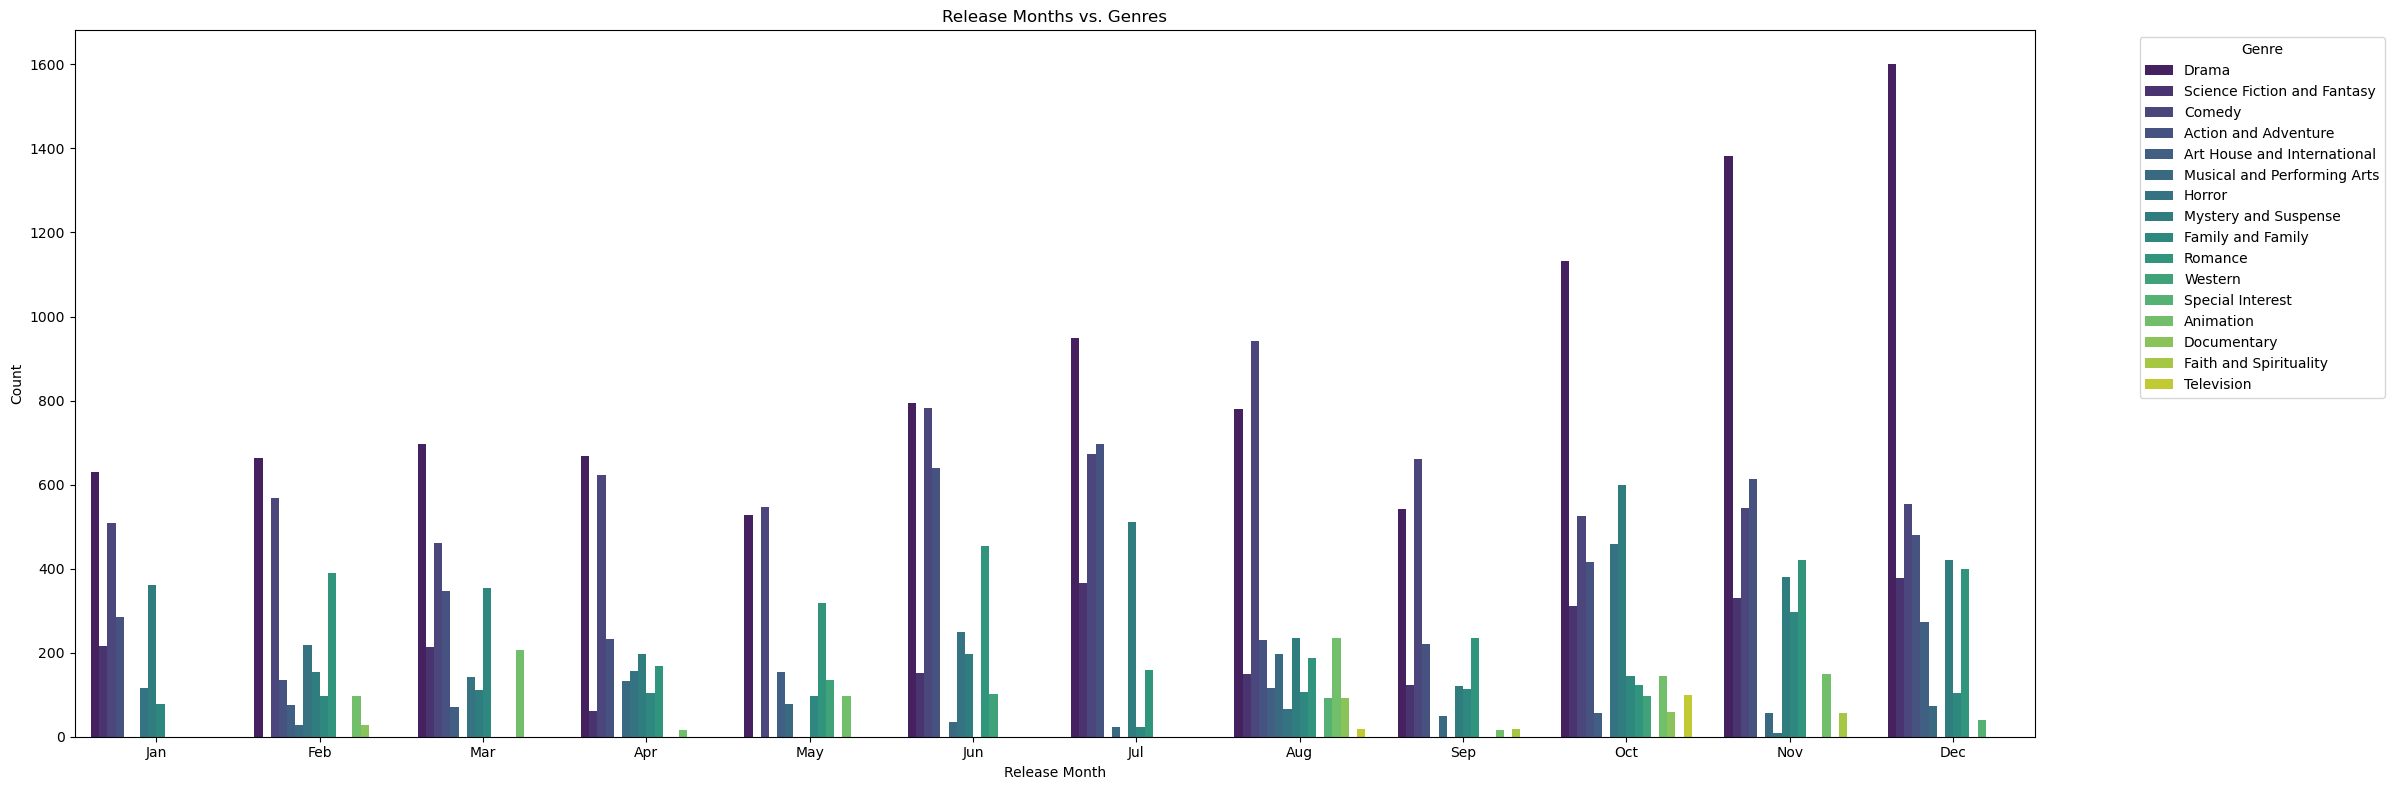

In [ ]:
# Create a count plot to visualize the relationship between release months and genres
plt.figure(figsize=(24, 8))
sns.countplot(data=df_merged, x='Release_Month', hue='mapped_genre', palette='viridis')
plt.title('Release Months vs. Gmapped_genre')
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

From the ananlysis, Drama movies have the highest production month on month basis and gradually rises throughout the year except for tye month of Sep where there was a drop in the release.

##  Step 5 Conclusions:  ##

Genre Anlysis: From the analysis, the best and top rated movies fall under Drama, Romance, Art House and International, Mystery and Suspense and Action& Adventure genres

Ratings Analysis: The most preffered movies fall under Drama and Art House and International as they are the top rated movies from our analysis.

Financial Analysis: We an determine the movie genres with the highest income generated from our analysis as Drama, Comedy, Science Fiction and Fantasy. These are the movies exihibiting robust gross income in total

Strategic Understanding: The data offers practical insights for Microsoft's movie studio to make well-informed decisions regarding genre selection, content strategy, and audience targeting.

## Recommendations: ##

Genre Creativity: The company should focus on high performing genres. While certain genres are prevalent, there's room for novelty and experimentation in genre selection. Microsoft's movie studio can explore unique genre combinations to distinguish its offerings and attract new audience segments.

Consider Audience Preferences: Examine the distribution of genres to align movie production with popular audience tastes while also exploring creative genre combinations for differentiation.

Diversify Genre Portfolio: While Drama and Art House and International dominate the market, explore opportunities in niche genres such as Romance, and Science Fiction and Fantasy to cater to diverse audience preferences.